## Converting R Code to Python Code

Missing values before cleaning:
inst          1
time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64
Missing values after cleaning:
inst         0
time         0
status       0
age          0
sex          0
ph.ecog      0
ph.karno     0
pat.karno    0
meal.cal     0
wt.loss      0
dtype: int64
Cox Model Summary:


<lifelines.CoxPHFitter: fitted with 167 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 167
   partial log-likelihood = -682.78
         time fit was run = 2025-03-03 16:48:00 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
inst      -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
age        0.00      1.00      0.01           -0.02            0.02                0.98                1.02
sex       -0.25      0.78      0.16           -0.57            0.07                0.56                1.07
ph.ecog    0.62      1.85      0.20            0.22            1.02                1.24                2.76
ph.karno   0.02      1.02      0.01            0.00            0.04                1.00                1.04
pat.karno -0.01      0.99      0.01           -0.02            0.00                0.98                1.00
meal.cal  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
wt.loss   -0.01      0.99      0.01           -0.02            0.00                0.98                1.00

           cmp to     z      p  -log2(p)
covariate                               
inst         0.00 -1.09   0.28      1.86
age          0.00  0.01   0.99      0.01
sex          0.00 -1.55   0.12      3.04
ph.ecog      0.00  3.01 <0.005      8.60
ph.karno     0.00  2.30   0.02      5.55
pat.karno    0.00 -1.35   0.18      2.50
meal.cal     0.00 -0.35   0.73      0.46
wt.loss      0.00 -1.68   0.09      3.41
---
Concordance = 0.60
Partial AIC = 1381.57
log-likelihood ratio test = 16.80 on 8 df
-log2(p) of ll-ratio test = 4.95

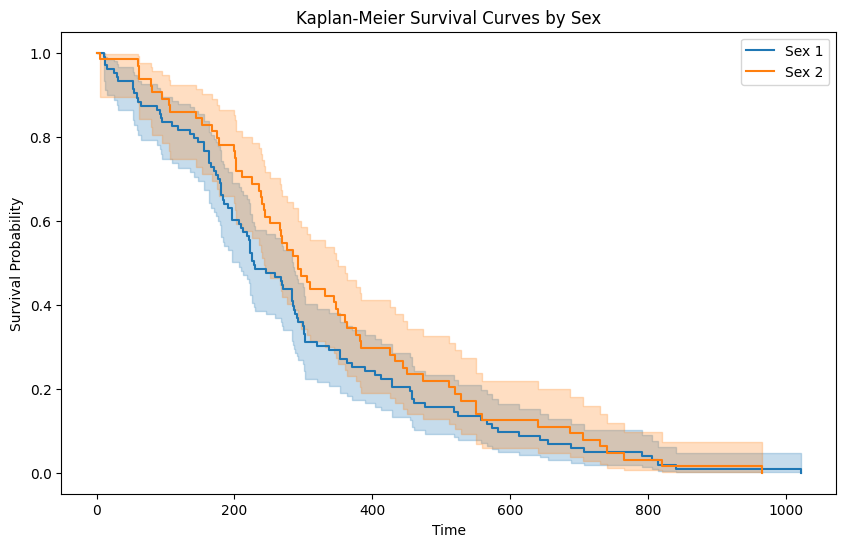

In [1]:
import pandas as pd
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt

data = pd.read_csv("R/data_censored.csv")

print("Missing values before cleaning:")
print(data.isnull().sum())

data_cleaned = data.dropna()

print("Missing values after cleaning:")
print(data_cleaned.isnull().sum())

cph = CoxPHFitter()
cph.fit(data_cleaned, duration_col='time', event_col='status')

print("Cox Model Summary:")
cph.print_summary()

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
for sex in data_cleaned['sex'].unique():
    mask = data_cleaned['sex'] == sex
    kmf.fit(data_cleaned[mask]['time'], data_cleaned[mask]['status'], label=f'Sex {sex}')
    kmf.plot()

plt.title("Kaplan-Meier Survival Curves by Sex")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()